<h1 style="color: #FECB05; text-align: center;"> Redes Neuronales Recurrentes</h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Modelo matemático de una RNN</span>](#dim-curse)
- [<span style="color: #005C99;">Usos y aplicaciones de RNN</span>](#dim-curse)
- [<span style="color: #005C99;">Ejemplo con datos de manchas solares</span>](#dim-curse)
- [<span style="color: #005C99;">LSTM (Long Short Term Memory)</span>](#dim-curse)
- [<span style="color: #005C99;">Ejemplo de simulación</span>](#dim-curse)
- [<span style="color: #005C99;">LSTM multipaso </span>](#dim-curse)
- [<span style="color: #005C99;">Referencias </span>](#dim-curse)

---

<h2 style="color: #007ACC;"> Introducción </h2>

Las Redes Neuronales Recurrentes (RNN, por sus siglas en inglés) son un tipo de arquitectura de redes neuronales diseñada específicamente para trabajar con datos secuenciales o temporales, como series de tiempo, texto, audio y video. A diferencia de las redes neuronales tradicionales, las RNN tienen la capacidad de mantener información de entradas anteriores mediante el uso de bucles internos, lo que las hace ideales para tareas donde el contexto y el orden de los datos son cruciales.

En una red neuronal recurrente, la salida de una capa no solo depende de la entrada actual, sino también del estado oculto, que transporta información de los pasos anteriores en la secuencia. Este estado oculto actúa como una "memoria" que permite a la red aprender patrones temporales. En cada paso del tiempo $t$, el estado oculto $h_t$ se actualiza mediante una función de activación que combina el estado anterior $h_{t-1}$ y la entrada actual $x_t$.

<img src="../img/RNN.png">

Fuente: [Dive into Deep Learning](https://d2l.ai/)

<h2 style="color: #007ACC;"> Modelo matemático de una RNN </h2>

Sea $x_{t}$ el valor de una serie de tiempo en el momento $t$. Primero, definimos el estado ocultos, $h_t$, en el momento $t$ como una memoria interna de la red que es capaz de almacenar toda la información pasada. Esto corresponde a un vector que contiene la información de todas las secuencias previas de la red y las salidas de las capas anteriores, esto permite comprender dependencias temporales.

$$h_t = f(W_{hh}h_{t-1} + W_{xh}x_t + b_h)$$

Donde:
- $h_t$: Estado oculto en el tiempo $t$.
- $x_t$: Entrada en el tiempo $t$.
- $W_{hh}$ y $W_{xh}$: Pesos asociados a las conexiones recurrentes y de entrada, respectivamente.
- $b_h$: Sesgo (bias).
- $f$: Función de activación, típicamente $tanh$ o $ReLU$.

La predicción de la red viene dada por:

$$y_{t} = g(W_{hy} h_{t} + b_{y})$$

Donde:

- $y_{t}$: salida de la red
- $W_{hy}$: pesos aprendibles en la capa de salida
- $b_{y}$: sesgo de la capa de salida
- $g$: función de activación en la capa de salida

El entrenamiento de las RNN utiliza un método conocido como retropropagación a través del tiempo para calcular gradientes y actualizar los pesos. Esto implica desenrollar la red en el tiempo y calcular gradientes acumulativos.

La entrada, $x_{t}$, corresponde a un un vector de los $K$ valores previos de la serie para ser considerados como predictoras de la serie en el momento $t$. Este valor es escogido por el usuario dependiendo de cuántos valores del pasado se quiera considerar.

<h2 style="color: #007ACC;"> Usos y aplicaciones de RNN </h2>

Análisis de series temporales:
- Predicción de ventas.
- Modelado del clima.
- Predicción de valores bursátiles.

Procesamiento de lenguaje natural (NLP):
- Traducción automática.
- Generación de texto.
- Reconocimiento del habla.

Análisis de secuencias biológicas:
- Predicción de estructuras de proteínas.
- Modelado de secuencias genéticas.

Generación de música:
- Composición automática basada en patrones musicales.

<h2 style="color: #007ACC;"> Ejemplo de simulación </h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [44]:
# Generar una serie temporal combinada (senoidal + ruido)
def generate_combined_wave(timesteps):
    x = np.linspace(0, 50, timesteps)
    y = np.sin(x) + 0.5 * np.sin(3 * x) + 0.3 * np.random.normal(size=timesteps)  # Combinación de ondas y ruido
    return y

In [45]:
timesteps = 200
data = generate_combined_wave(200)

Text(0.5, 1.0, 'Simulación de serie temporal')

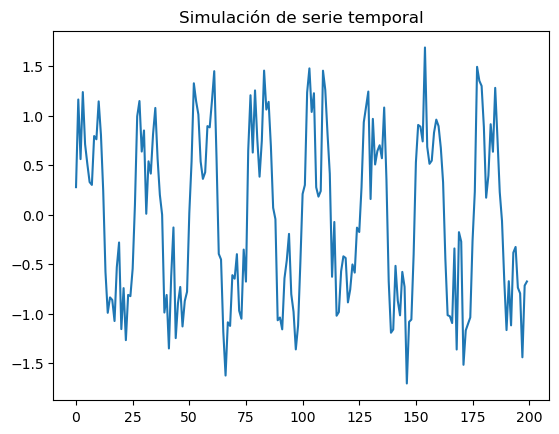

In [46]:
plt.plot(data)
plt.title('Simulación de serie temporal')

In [47]:
# Crear secuencias para entrenamiento
sequence_length = 50
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])

In [48]:
X = np.array(X)
y = np.array(y)

In [49]:
X.shape

(150, 50)

In [50]:
# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [51]:
# Crear el modelo
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

In [52]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Reshape de los datos para ajustar al modelo
X_train = X_train[..., np.newaxis]  # Añadir dimensión para características
X_test = X_test[..., np.newaxis]

In [55]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 0s 42ms/step - loss: 0.4140 - val_loss: 0.2813
Epoch 2/20
3/3 [==============================] - 0s 9ms/step - loss: 0.2455 - val_loss: 0.2208
Epoch 3/20
3/3 [==============================] - 0s 8ms/step - loss: 0.2045 - val_loss: 0.1943
Epoch 4/20
3/3 [==============================] - 0s 8ms/step - loss: 0.1574 - val_loss: 0.1529
Epoch 5/20
3/3 [==============================] - 0s 8ms/step - loss: 0.1274 - val_loss: 0.1608
Epoch 6/20
3/3 [==============================] - 0s 8ms/step - loss: 0.1331 - val_loss: 0.1563
Epoch 7/20
3/3 [==============================] - 0s 8ms/step - loss: 0.1220 - val_loss: 0.1371
Epoch 8/20
3/3 [==============================] - 0s 9ms/step - loss: 0.1210 - val_loss: 0.1315
Epoch 9/20
3/3 [==============================] - 0s 8ms/step - loss: 0.1155 - val_loss: 0.1280
Epoch 10/20
3/3 [==============================] - 0s 9ms/step - loss: 0.1051 - val_loss: 0.1382
Epoch 11/20
3/3 [=====================

1/1 [==============================] - 0s 15ms/step


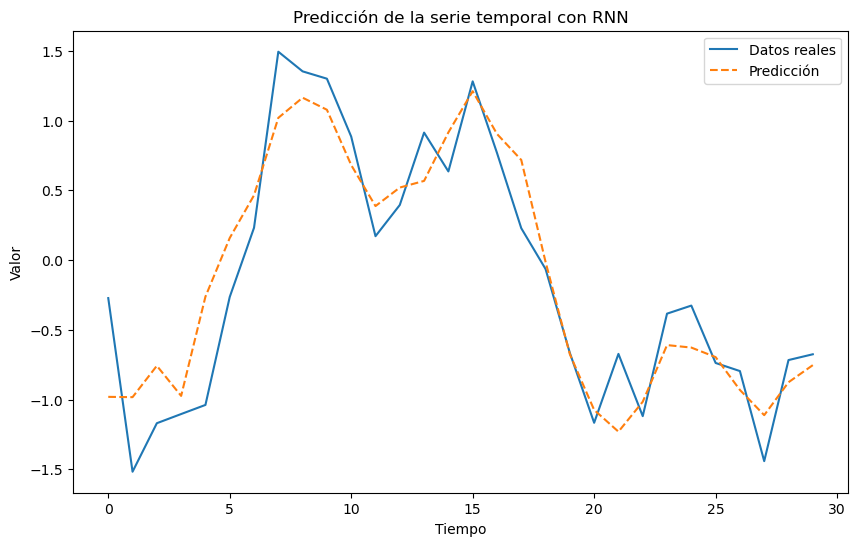

In [57]:
# Predicciones
y_pred = model.predict(X_test)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Datos reales')
plt.plot(range(len(y_pred)), y_pred, label='Predicción', linestyle='--')
plt.legend()
plt.title('Predicción de la serie temporal con RNN')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

<h2 style="color: #007ACC;"> Ejemplo con datos de manchas solares </h2>

El siguiente ejemplo utiliza datos de las manchas solares, publicado por el centro de análisis de datos de influencias solares: https://www.sidc.be/SILSO/dayssnplot. Y el desarrollo del ejercicio está inspirado en el ejemplo de [Jason Brownlee](https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/)

In [60]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [61]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data


In [62]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [63]:
train_data

array([0.22852638, 0.24665089, 0.2758077 , ..., 0.3506698 , 0.4546887 ,
       0.4862096 ], dtype=float32)

Text(0.5, 1.0, 'Histórico del número de manchas solares')

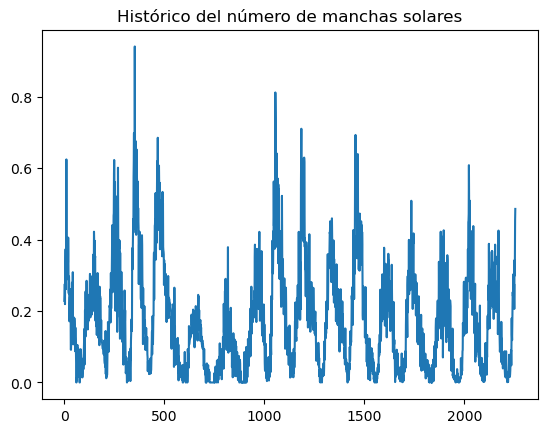

In [65]:
plt.plot(train_data)
plt.title('Histórico del número de manchas solares')

In [66]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y


In [67]:
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [68]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [69]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
187/187 - 0s - loss: 0.4220 - 400ms/epoch - 2ms/step
Epoch 2/20
187/187 - 0s - loss: 0.1617 - 124ms/epoch - 665us/step
Epoch 3/20
187/187 - 0s - loss: 0.0972 - 123ms/epoch - 657us/step
Epoch 4/20
187/187 - 0s - loss: 0.0671 - 134ms/epoch - 719us/step
Epoch 5/20
187/187 - 0s - loss: 0.0496 - 127ms/epoch - 677us/step
Epoch 6/20
187/187 - 0s - loss: 0.0372 - 128ms/epoch - 687us/step
Epoch 7/20
187/187 - 0s - loss: 0.0282 - 125ms/epoch - 670us/step
Epoch 8/20
187/187 - 0s - loss: 0.0213 - 125ms/epoch - 669us/step
Epoch 9/20
187/187 - 0s - loss: 0.0162 - 128ms/epoch - 682us/step
Epoch 10/20
187/187 - 0s - loss: 0.0117 - 125ms/epoch - 671us/step
Epoch 11/20
187/187 - 0s - loss: 0.0088 - 125ms/epoch - 668us/step
Epoch 12/20
187/187 - 0s - loss: 0.0067 - 126ms/epoch - 673us/step
Epoch 13/20
187/187 - 0s - loss: 0.0059 - 124ms/epoch - 662us/step
Epoch 14/20
187/187 - 0s - loss: 0.0056 - 126ms/epoch - 671us/step
Epoch 15/20
187/187 - 0s - loss: 0.0052 - 124ms/epoch - 666us/step
Epoch 

In [70]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 1ms/step
Train RMSE: 0.066 RMSE
Test RMSE: 0.096 RMSE


In [75]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Real', 'Predicción'])
    plt.xlabel('Momento del tiempo')
    plt.ylabel('Manchas solares (escaladas()')
    plt.title('Datos reales y predicciones. La línea roja separa los datos de entrenamiento y los de test')

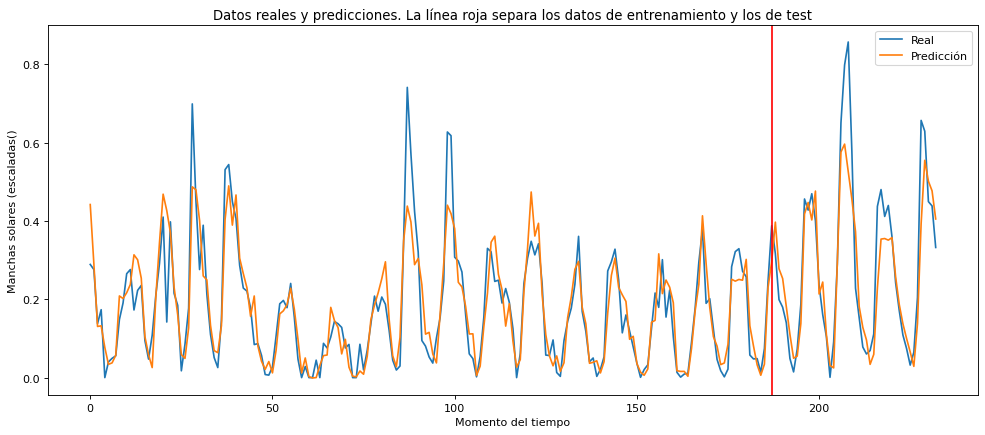

In [76]:
plot_result(trainY, testY, train_predict, test_predict)

<h2 style="color: #007ACC;"> LSTM (Long Short Term Memory) </h2>

Las Long Short-Term Memory (LSTM) son una variante de las redes neuronales recurrentes (RNN) diseñadas para resolver las limitaciones de las RNN clásicas, particularmente el problema del desvanecimiento y explosión del gradiente. Las LSTM introducen un mecanismo especial llamado celdas de memoria, que les permite mantener información durante largos períodos de tiempo y, por lo tanto, capturar dependencias a largo plazo en los datos secuenciales. Principalmente, tienen las siguientes características:

- Memoria de largo plazo: A través de las celdas de memoria, las LSTM pueden retener información relevante durante muchas iteraciones temporales.
- Puertas de control: Las LSTM usan tres puertas (entrada, olvido y salida) para controlar el flujo de información, lo que les permite decidir qué conservar, qué actualizar y qué descartar.
- Adaptabilidad:Son adecuadas para tareas donde las dependencias temporales no son evidentes o son complejas.

<img src="../img/lstm.png">

Fuente: [Dive into Deep Learning](https://d2l.ai/)

<h3 style="color: #007ACC;"> Modelo matemático de las LSTM </h3>

En una celda LSTM, las **puertas** son mecanismos que controlan cómo la información fluye dentro y fuera de la celda de memoria. Estas puertas permiten a las LSTM decidir de manera dinámica qué información conservar, cuál olvidar y qué parte del estado de la celda usar para las predicciones. Esto las hace mucho más efectivas que las RNN clásicas para capturar dependencias a largo plazo en los datos.

Las LSTM tienen **tres puertas principales**: la puerta de olvido, la puerta de entrada, y la puerta de salida. A continuación, explicamos sus funciones:

### **1. Puerta de olvido ($f_t $)**
La puerta de olvido controla qué parte del estado de la celda previa ($C_{t-1}$) debe descartarse. Esto es crucial para evitar que la celda de memoria acumule información irrelevante a lo largo del tiempo.

$$f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)$$

- **$\sigma$:** Función sigmoide, que genera valores entre 0 y 1.
- **Entrada:** Estado oculto anterior ($h_{t-1}$) y entrada actual ($x_t$).
- **Salida:** Un vector de pesos entre 0 y 1 que indica cuánto "olvidar" de cada componente del estado de la celda previa.

### **2. Puerta de entrada ($i_t$)**
La puerta de entrada decide qué nueva información será añadida al estado de la celda ($C_t$).

1. **Calcular la activación de la puerta de entrada:**


   $$i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)$$

3. **Calcular la candidata de memoria ($\tilde{C}_t$):**


   $$\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)$$

5. **Actualizar el estado de la celda:**


   $$C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t$$

- **$i_t$:** Determina cuánto de la nueva información candidata ($\tilde{C}_t$) debe agregarse.
- **$\tilde{C}_t$:** Representa los posibles valores de nueva memoria.
- Permite que la red incorpore información relevante de la entrada actual en el estado de la celda.
- Ayuda a la red a actualizar dinámicamente su memoria con datos significativos.

### **3. Puerta de salida ($o_t$)**
La puerta de salida controla qué parte del estado de la celda ($C_t$) se utilizará para generar el estado oculto actual ($h_t$), que a su vez será la salida de la celda.

1. **Calcular la activación de la puerta de salida:**


   $$o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)$$

3. **Generar el estado oculto:**

   $$h_t = o_t \cdot \tanh(C_t)$$

- **$o_t$:** Determina qué parte del estado de la celda es relevante para la salida.
- **$\tanh(C_t)$:** Escala el estado de la celda al rango $[-1, 1]$ antes de aplicarlo.
- Controla la salida final de la celda en cada paso temporal.
- Permite que la red utilice selectivamente la información almacenada para las predicciones o los pasos posteriores.

### **Flujo completo de información:**
1. **Olvido:** La puerta de olvido decide qué partes del estado de la celda previa no son relevantes y deben ser eliminadas.
2. **Actualización:** La puerta de entrada actualiza el estado de la celda con nueva información útil.
3. **Salida:** La puerta de salida selecciona qué parte del estado de la celda debe influir en la salida y el estado oculto actual.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [39]:
# Generar una serie temporal combinada (senoidal + ruido)
def generate_combined_wave(timesteps):
    x = np.linspace(0, 50, timesteps)
    y = np.sin(x) + 0.5 * np.sin(3 * x) + 0.3 * np.random.normal(size=timesteps)  # Combinación de ondas y ruido
    return y

In [40]:
# Configuración de los datos
timesteps = 500
data = generate_combined_wave(timesteps)

In [41]:
# Crear secuencias para entrenamiento
sequence_length = 50
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i + sequence_length])
    y.append(data[i + sequence_length])

In [42]:
X = np.array(X)
y = np.array(y)

In [43]:
# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

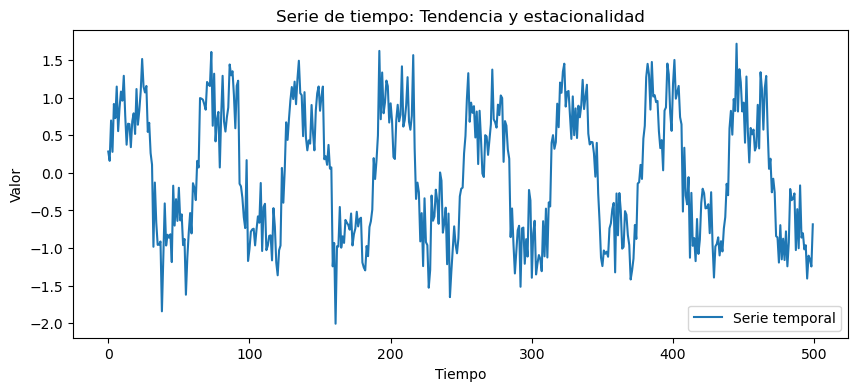

In [44]:
# Visualizar la serie de tiempo
plt.figure(figsize=(10, 4))
plt.plot(range(len(data)), data, label="Serie temporal")
plt.title("Serie de tiempo: Tendencia y estacionalidad")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [45]:
# Crear el modelo
model = Sequential([
    LSTM(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

In [46]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

In [47]:
# Reshape de los datos para ajustar al modelo
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [48]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 1s 25ms/step - loss: 0.7258 - val_loss: 0.5763
Epoch 2/20
9/9 [==============================] - 0s 8ms/step - loss: 0.5062 - val_loss: 0.4336
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 0.3950 - val_loss: 0.3494
Epoch 4/20
9/9 [==============================] - 0s 8ms/step - loss: 0.3121 - val_loss: 0.2861
Epoch 5/20
9/9 [==============================] - 0s 8ms/step - loss: 0.2720 - val_loss: 0.2551
Epoch 6/20
9/9 [==============================] - 0s 8ms/step - loss: 0.2389 - val_loss: 0.2294
Epoch 7/20
9/9 [==============================] - 0s 8ms/step - loss: 0.2211 - val_loss: 0.1975
Epoch 8/20
9/9 [==============================] - 0s 8ms/step - loss: 0.1896 - val_loss: 0.1775
Epoch 9/20
9/9 [==============================] - 0s 8ms/step - loss: 0.1740 - val_loss: 0.1568
Epoch 10/20
9/9 [==============================] - 0s 8ms/step - loss: 0.1611 - val_loss: 0.1588
Epoch 11/20
9/9 [=====================

3/3 [==============================] - 0s 3ms/step


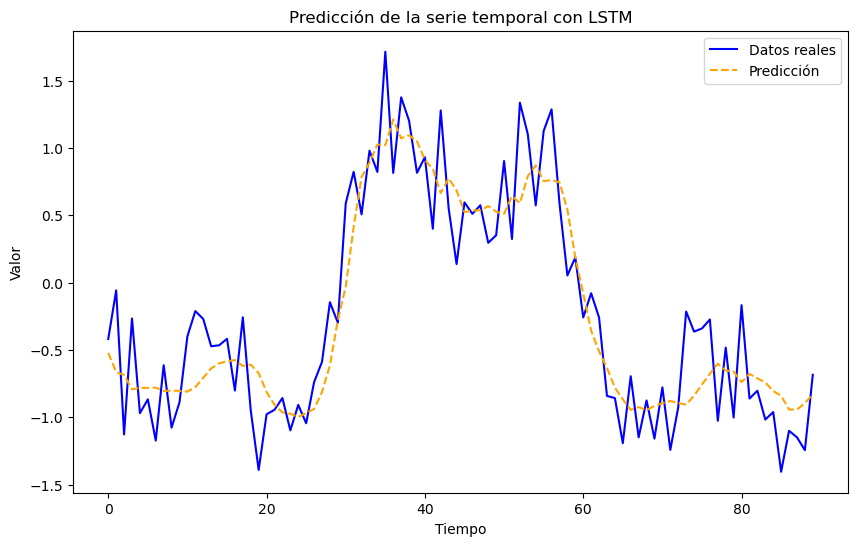

In [49]:
# Predicciones
y_pred = model.predict(X_test)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Datos reales', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicción', linestyle='--', color='orange')
plt.title('Predicción de la serie temporal con LSTM')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

<h2 style="color: #007ACC;"> Ejemplo con datos de pasajeros de una aerolínea </h2>

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')

In [60]:
df

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


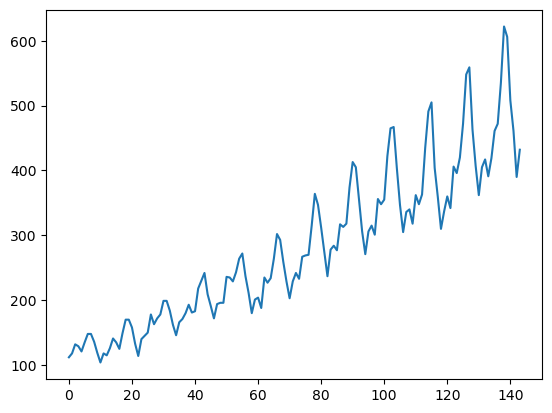

In [61]:
plt.plot(df)
plt.show()

In [63]:
dataset = df.values
dataset = dataset.astype('float32')

In [64]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [65]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [73]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [79]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [81]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [83]:
print(trainX.shape, testX.shape)

(85, 1, 10) (37, 1, 10)


In [84]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
85/85 - 1s - loss: 0.0431 - 520ms/epoch - 6ms/step
Epoch 2/100
85/85 - 0s - loss: 0.0113 - 44ms/epoch - 520us/step
Epoch 3/100
85/85 - 0s - loss: 0.0067 - 41ms/epoch - 485us/step
Epoch 4/100
85/85 - 0s - loss: 0.0058 - 43ms/epoch - 501us/step
Epoch 5/100
85/85 - 0s - loss: 0.0049 - 44ms/epoch - 517us/step
Epoch 6/100
85/85 - 0s - loss: 0.0043 - 44ms/epoch - 515us/step
Epoch 7/100
85/85 - 0s - loss: 0.0037 - 43ms/epoch - 510us/step
Epoch 8/100
85/85 - 0s - loss: 0.0034 - 43ms/epoch - 507us/step
Epoch 9/100
85/85 - 0s - loss: 0.0032 - 43ms/epoch - 511us/step
Epoch 10/100
85/85 - 0s - loss: 0.0030 - 43ms/epoch - 507us/step
Epoch 11/100
85/85 - 0s - loss: 0.0028 - 43ms/epoch - 509us/step
Epoch 12/100
85/85 - 0s - loss: 0.0028 - 41ms/epoch - 488us/step
Epoch 13/100
85/85 - 0s - loss: 0.0024 - 43ms/epoch - 506us/step
Epoch 14/100
85/85 - 0s - loss: 0.0024 - 43ms/epoch - 508us/step
Epoch 15/100
85/85 - 0s - loss: 0.0024 - 42ms/epoch - 500us/step
Epoch 16/100
85/85 - 0s - loss: 0.0

In [85]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 968us/step


In [86]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [87]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.01 RMSE
Test Score: 36.69 RMSE


In [88]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

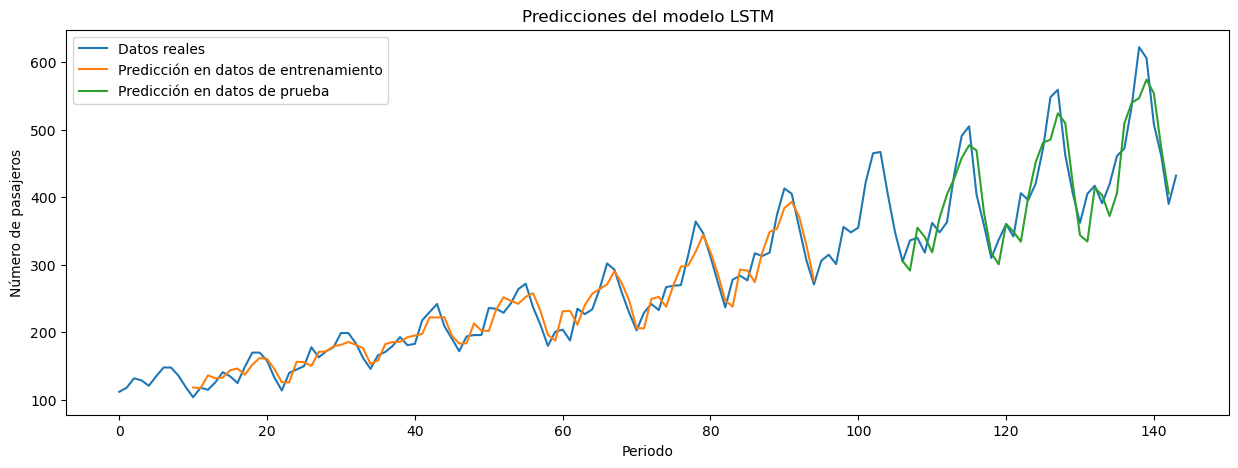

In [99]:
# plot baseline and predictions
plt.figure(figsize=(15,5))
plt.plot(scaler.inverse_transform(dataset), label='Datos reales')
plt.plot(trainPredictPlot, label='Predicción en datos de entrenamiento')
plt.plot(testPredictPlot, label='Predicción en datos de prueba')
plt.legend()
plt.title('Predicciones del modelo LSTM')
plt.ylabel('Número de pasajeros')
plt.xlabel('Periodo')
plt.show()

<h2 style="color: #007ACC;"> LSTM multipaso </h2>

Las LSTM multipaso extienden las capacidades de las LSTM convencionales al permitir que estas generen una secuencia de múltiples valores de salida, en lugar de predecir un único valor en cada paso temporal. Para comprender esta arquitectura desde una perspectiva matemática, es necesario analizar cómo se manejan las entradas, los estados internos y las salidas para procesar tanto la secuencia de entrada como la secuencia de predicciones futuras.

En una LSTM convencional, cada celda procesa una entrada $x_t$ en un momento dado $t$ y produce un estado oculto $h_t$, que encapsula información contextual, y un estado de celda $C_t$, que actúa como memoria a largo plazo.

En una LSTM multipaso, este flujo se adapta para predecir varios pasos futuros. En lugar de producir un único $y_t$ como salida en cada paso, la red produce una secuencia de predicciones $[y_{t+1}, y_{t+2}, \ldots, y_{t+k}]$, donde $k$ es el número de pasos futuros deseados. 

El entrenamiento de una LSTM multipaso se configura de la siguiente manera:
1. Se utiliza una secuencia de entrada fija de longitud $n$, representada como $X = [x_{t-n+1}, x_{t-n+2}, \ldots, x_t]$.
2. La salida deseada es una secuencia de longitud $k$, representada como $Y = [x_{t+1}, x_{t+2}, \ldots, x_{t+k}]$.

Para lograr esto, el modelo puede ser configurado para:
1. Predecir un solo paso futuro en cada iteración y alimentar esa predicción como entrada para el siguiente paso (predicción autoregresiva).
2. Producir toda la secuencia de predicciones futuras $k$ de una sola vez.

En el segundo caso, comúnmente utilizado en LSTM multipaso, la capa de salida del modelo es ajustada para que produzca una salida de forma $(\text{batch\_size}, k)$, lo que significa que el modelo genera una secuencia completa de $k$ valores en un solo paso de inferencia. Esto se logra al añadir una capa densa al final del modelo con $k$ neuronas, cada una encargada de predecir un valor futuro en la secuencia.

Desde el punto de vista de la pérdida, el modelo multipaso típicamente utiliza una función como el error cuadrático medio (MSE), que se calcula entre la secuencia de predicciones $Y_{\text{pred}}$ y la secuencia de valores reales $Y_{\text{real}}$:

$$\text{MSE} = \frac{1}{k} \sum_{i=1}^{k} (Y_{\text{real}, i} - Y_{\text{pred}, i})^2$$

Esta configuración permite a las LSTM multipaso aprender tanto patrones a corto plazo en los datos como tendencias globales que influyen en predicciones más lejanas. El diseño de estas redes las hace altamente eficaces en aplicaciones donde se requiere modelar la dinámica temporal de un sistema.

In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# Generar una serie temporal con tendencia y estacionalidad
def generate_combined_wave(timesteps):
    x = np.linspace(0, 50, timesteps)
    y = np.sin(x) + 0.5 * np.sin(3 * x) + 0.3 * np.random.normal(size=timesteps)  # Combinación de ondas y ruido
    return y

In [118]:
# Configuración de los datos
timesteps = 500
data = generate_combined_wave(timesteps)

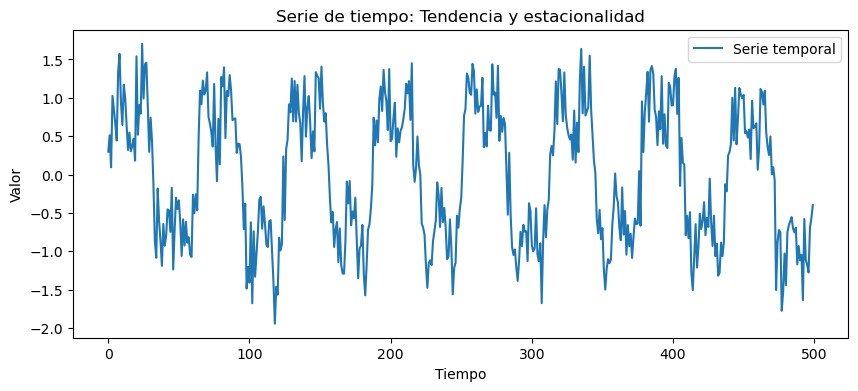

In [119]:
# Visualizar la serie de tiempo
plt.figure(figsize=(10, 4))
plt.plot(data, label="Serie temporal")
plt.title("Serie de tiempo: Tendencia y estacionalidad")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.show()

In [120]:
# Parámetros del modelo
sequence_length = 50  # Longitud de entrada
future_steps = 10     # Pasos futuros a predecir

In [121]:
# Crear secuencias para entrenamiento
X, y = [], []
for i in range(len(data) - sequence_length - future_steps):
    X.append(data[i:i + sequence_length])  # Secuencia de entrada
    y.append(data[i + sequence_length:i + sequence_length + future_steps])  # Secuencia de salida

In [122]:
X = np.array(X)
y = np.array(y)

In [123]:
# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [124]:
# Reshape de los datos para el modelo
X_train = X_train[..., np.newaxis]  # Añadir dimensión para características
X_test = X_test[..., np.newaxis]

In [125]:
print("Forma de X (entrada):", X_train.shape)  # (batch_size, sequence_length, 1)
print("Forma de y (salida):", y_train.shape)  # (batch_size, future_steps)

Forma de X (entrada): (352, 50, 1)
Forma de y (salida): (352, 10)


In [126]:
# Crear el modelo LSTM
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(future_steps)  # Salida de longitud igual a future_steps
])

In [127]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

In [128]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 1s 28ms/step - loss: 0.7394 - val_loss: 0.7050
Epoch 2/20
9/9 [==============================] - 0s 11ms/step - loss: 0.6813 - val_loss: 0.6465
Epoch 3/20
9/9 [==============================] - 0s 11ms/step - loss: 0.6117 - val_loss: 0.5550
Epoch 4/20
9/9 [==============================] - 0s 11ms/step - loss: 0.4788 - val_loss: 0.3872
Epoch 5/20
9/9 [==============================] - 0s 11ms/step - loss: 0.3486 - val_loss: 0.3023
Epoch 6/20
9/9 [==============================] - 0s 11ms/step - loss: 0.2645 - val_loss: 0.2742
Epoch 7/20
9/9 [==============================] - 0s 11ms/step - loss: 0.2265 - val_loss: 0.2395
Epoch 8/20
9/9 [==============================] - 0s 11ms/step - loss: 0.2054 - val_loss: 0.2438
Epoch 9/20
9/9 [==============================] - 0s 18ms/step - loss: 0.1935 - val_loss: 0.2153
Epoch 10/20
9/9 [==============================] - 0s 11ms/step - loss: 0.1818 - val_loss: 0.1989
Epoch 11/20
9/9 [============

3/3 [==============================] - 0s 3ms/step


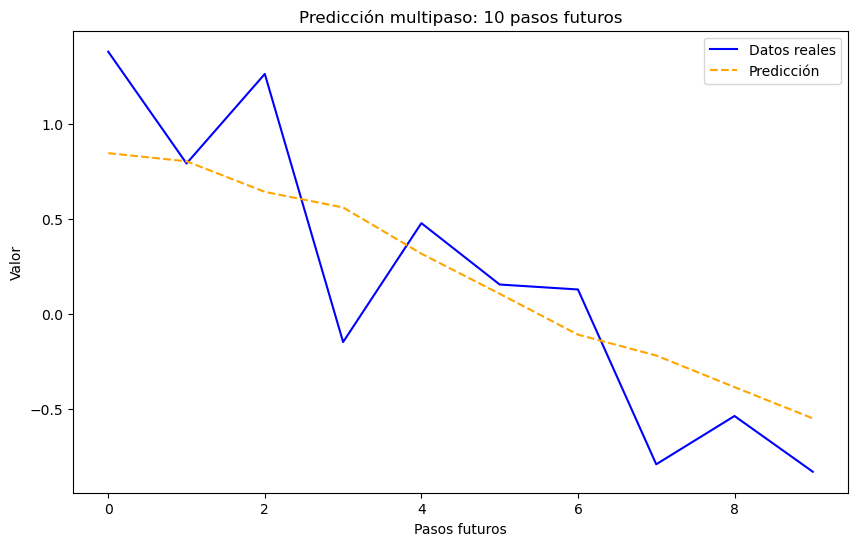

In [129]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Visualizar las predicciones para la primera muestra de prueba
plt.figure(figsize=(10, 6))
plt.plot(range(future_steps), y_test[0], label='Datos reales', color='blue')
plt.plot(range(future_steps), y_pred[0], label='Predicción', linestyle='--', color='orange')
plt.title(f'Predicción multipaso: {future_steps} pasos futuros')
plt.xlabel('Pasos futuros')
plt.ylabel('Valor')
plt.legend()
plt.show()

<h2 style="color: #007ACC;"> Referencias </h2>

- https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/
- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
- [Dive into Deep Learning](https://d2l.ai/)
- Ejemplo de la documentación oficial de Keras: https://www.tensorflow.org/tutorials/structured_data/time_series